In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import files
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from sklearn.metrics import pairwise_distances_argmin_min

In [ ]:
files.upload()

Saving ass4q2.csv to ass4q2.csv


{'ass4q2.csv': b'Item#,Total sales,hour 1,hour 2,hour 3,hour 4,hour 5,hour 6,hour 7,hour 8,hour 9,hour 10,hour 11,hour 12,hour 13,hour 14,hour 15,hour 16,hour 17,hour 18,hour 19,hour 20,hour 21,hour 22,hour 23,hour 24,Total Sale,Sold Out\r\n1,2854,0.113,0.066,0.064,0.064,0.016,0.052,0.042,0.029,0.037,0.031,0.002,0.054,0.051,0.053,0.039,0.038,0.027,0.034,0.027,0.004,0.006,0.044,0.039,0.001,0.930,No\r\n2,2817,0.116,0.051,0.025,0.011,0.072,0.038,0.009,0.046,0.015,0.045,0.075,0.058,0.006,0.047,0.024,0.049,0.047,0.042,0.035,0.041,0.013,0.032,0.012,0.029,0.937,No\r\n3,5089,0.118,0.032,0.072,0.040,0.071,0.018,0.051,0.024,0.073,0.025,0.015,0.035,0.065,0.032,0.022,0.029,0.048,0.039,0.015,0.037,0.048,0.036,0.033,0.018,0.995,No\r\n4,6906,0.138,0.016,0.019,0.048,0.027,0.010,0.015,0.006,0.038,0.050,0.040,0.062,0.007,0.035,0.036,0.028,0.027,0.037,0.029,0.046,0.046,0.034,0.003,0.045,0.842,No\r\n5,3115,0.116,0.032,0.048,0.054,0.035,0.049,0.023,0.075,0.063,0.082,0.064,0.037,0.003,0.134,0.038,0.048,0.03

In [ ]:
df=pd.read_csv("ass4q2.csv")
df

,Item#,Total sales,hour 1,hour 2,hour 3,hour 4,hour 5,hour 6,hour 7,hour 8,...,hour 17,hour 18,hour 19,hour 20,hour 21,hour 22,hour 23,hour 24,Total Sale,Sold Out
0,1,2854,0.113,0.066,0.064,0.064,0.016,0.052,0.042,0.029,...,0.027,0.034,0.027,0.004,0.006,0.044,0.039,0.001,0.930,No
1,2,2817,0.116,0.051,0.025,0.011,0.072,0.038,0.009,0.046,...,0.047,0.042,0.035,0.041,0.013,0.032,0.012,0.029,0.937,No
2,3,5089,0.118,0.032,0.072,0.040,0.071,0.018,0.051,0.024,...,0.048,0.039,0.015,0.037,0.048,0.036,0.033,0.018,0.995,No
3,4,6906,0.138,0.016,0.019,0.048,0.027,0.010,0.015,0.006,...,0.027,0.037,0.029,0.046,0.046,0.034,0.003,0.045,0.842,No
4,5,3115,0.116,0.032,0.048,0.054,0.035,0.049,0.023,0.075,...,0.039,0.044,0.012,0.004,0.000,0.000,0.000,0.000,1.000,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2441,2442,4105,0.134,0.071,0.051,0.055,0.040,0.021,0.081,0.074,...,0.045,0.040,0.003,0.018,0.003,0.015,0.031,0.016,0.991,No
2442,2443,3498,0.132,0.014,0.063,0.018,0.042,0.050,0.066,0.018,...,0.041,0.036,0.048,0.010,0.005,0.021,0.014,0.018,0.878,No
2443,2444,5201,0.100,0.019,0.075,0.055,0.010,0.063,0.036,0.046,...,0.037,0.049,0.047,0.046,0.048,0.004,0.028,0.029,0.957,No
2444,2445,7393,0.139,0.021,0.066,0.068,0.083,0.070,0.018,0.037,...,0.028,0.020,0.013,0.000,0.000,0.000,0.000,0.000,1.000,Yes


***Filtering for not Sould Out items for K means clustering for our training set.***

In [ ]:
x = df[df["Sold Out"] == "No"]
x

,Item#,Total sales,hour 1,hour 2,hour 3,hour 4,hour 5,hour 6,hour 7,hour 8,...,hour 17,hour 18,hour 19,hour 20,hour 21,hour 22,hour 23,hour 24,Total Sale,Sold Out
0,1,2854,0.113,0.066,0.064,0.064,0.016,0.052,0.042,0.029,...,0.027,0.034,0.027,0.004,0.006,0.044,0.039,0.001,0.930,No
1,2,2817,0.116,0.051,0.025,0.011,0.072,0.038,0.009,0.046,...,0.047,0.042,0.035,0.041,0.013,0.032,0.012,0.029,0.937,No
2,3,5089,0.118,0.032,0.072,0.040,0.071,0.018,0.051,0.024,...,0.048,0.039,0.015,0.037,0.048,0.036,0.033,0.018,0.995,No
3,4,6906,0.138,0.016,0.019,0.048,0.027,0.010,0.015,0.006,...,0.027,0.037,0.029,0.046,0.046,0.034,0.003,0.045,0.842,No
6,7,5950,0.147,0.012,0.051,0.013,0.071,0.041,0.007,0.052,...,0.045,0.049,0.048,0.034,0.002,0.035,0.004,0.023,0.856,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,2441,4307,0.125,0.061,0.064,0.020,0.014,0.011,0.018,0.021,...,0.036,0.026,0.027,0.040,0.013,0.047,0.036,0.006,0.833,No
2441,2442,4105,0.134,0.071,0.051,0.055,0.040,0.021,0.081,0.074,...,0.045,0.040,0.003,0.018,0.003,0.015,0.031,0.016,0.991,No
2442,2443,3498,0.132,0.014,0.063,0.018,0.042,0.050,0.066,0.018,...,0.041,0.036,0.048,0.010,0.005,0.021,0.014,0.018,0.878,No
2443,2444,5201,0.100,0.019,0.075,0.055,0.010,0.063,0.036,0.046,...,0.037,0.049,0.047,0.046,0.048,0.004,0.028,0.029,0.957,No


***Retreived Hourly Data only ***

In [ ]:
y = x.iloc[:, 2:-2]
y

,hour 1,hour 2,hour 3,hour 4,hour 5,hour 6,hour 7,hour 8,hour 9,hour 10,...,hour 15,hour 16,hour 17,hour 18,hour 19,hour 20,hour 21,hour 22,hour 23,hour 24
0,0.113,0.066,0.064,0.064,0.016,0.052,0.042,0.029,0.037,0.031,...,0.039,0.038,0.027,0.034,0.027,0.004,0.006,0.044,0.039,0.001
1,0.116,0.051,0.025,0.011,0.072,0.038,0.009,0.046,0.015,0.045,...,0.024,0.049,0.047,0.042,0.035,0.041,0.013,0.032,0.012,0.029
2,0.118,0.032,0.072,0.040,0.071,0.018,0.051,0.024,0.073,0.025,...,0.022,0.029,0.048,0.039,0.015,0.037,0.048,0.036,0.033,0.018
3,0.138,0.016,0.019,0.048,0.027,0.010,0.015,0.006,0.038,0.050,...,0.036,0.028,0.027,0.037,0.029,0.046,0.046,0.034,0.003,0.045
6,0.147,0.012,0.051,0.013,0.071,0.041,0.007,0.052,0.042,0.015,...,0.033,0.021,0.045,0.049,0.048,0.034,0.002,0.035,0.004,0.023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,0.125,0.061,0.064,0.020,0.014,0.011,0.018,0.021,0.005,0.014,...,0.026,0.029,0.036,0.026,0.027,0.040,0.013,0.047,0.036,0.006
2441,0.134,0.071,0.051,0.055,0.040,0.021,0.081,0.074,0.027,0.031,...,0.028,0.044,0.045,0.040,0.003,0.018,0.003,0.015,0.031,0.016
2442,0.132,0.014,0.063,0.018,0.042,0.050,0.066,0.018,0.067,0.021,...,0.032,0.035,0.041,0.036,0.048,0.010,0.005,0.021,0.014,0.018
2443,0.100,0.019,0.075,0.055,0.010,0.063,0.036,0.046,0.032,0.041,...,0.026,0.037,0.037,0.049,0.047,0.046,0.048,0.004,0.028,0.029


In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(y)

***Caluclating Euclidean distance to check simialrity in data points and assigning better clusters.***

In [ ]:
euclidean_distances = cdist(y, y, metric='euclidean')
euclidean_distances

array([[0.        , 0.14597603, 0.11326518, ..., 0.13643313, 0.1190126 ,
        0.15584287],
       [0.14597603, 0.        , 0.14246403, ..., 0.12434227, 0.129     ,
        0.18779244],
       [0.11326518, 0.14246403, 0.        , ..., 0.1193943 , 0.1192686 ,
        0.15563419],
       ...,
       [0.13643313, 0.12434227, 0.1193943 , ..., 0.        , 0.11019982,
        0.18776315],
       [0.1190126 , 0.129     , 0.1192686 , ..., 0.11019982, 0.        ,
        0.18489727],
       [0.15584287, 0.18779244, 0.15563419, ..., 0.18776315, 0.18489727,
        0.        ]])

***K Means Clustering with for loop over a range of hyperparameters***

In [ ]:
k_range = range(1, 15)
n_init_r= range(10, 35)
distance_parameter = []

for k in k_range:
    ssd = []
    for n_init in n_init_r:
        kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(y)
        ssd.append(kmeans.inertia_)
    distance_parameter.append(ssd)

***Distance matrix to understand the distance of data points from centroid***


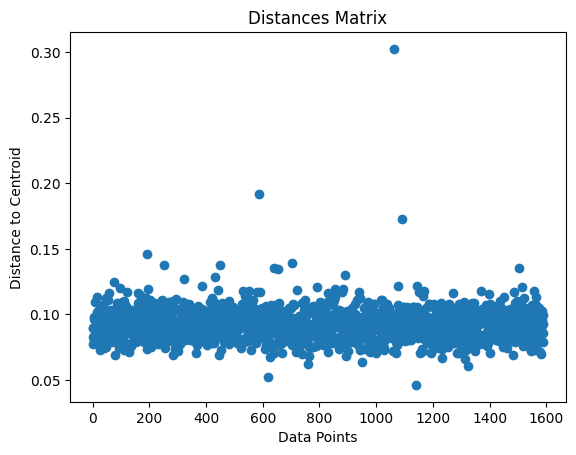

In [ ]:
kmeans.fit(y)
centroids = kmeans.cluster_centers_
distances_to_centroids = pairwise_distances_argmin_min(y, centroids)[1]
plt.scatter(range(len(distances_to_centroids)), distances_to_centroids)
plt.title('Distances Matrix')
plt.xlabel('Data Points')
plt.ylabel('Distance to Centroid')
plt.show()

In the plot above we can observe the distances of data points from their nearest cluster centroids. This has been done through K-means clustering. X axis tells the data point and y asix shows its distance to nearest Centroid.

As seen above, most data points are concentrated towards the bottom. This proves that these points lie close to their centroids. This shows that the clusters accurately reflect the data's distribution.

However, some data points appear further away from the x-axis, indicating a larger distance to their centroids. These can be outliers affecting the overall performance of the model or chose clusters might not be optimal.

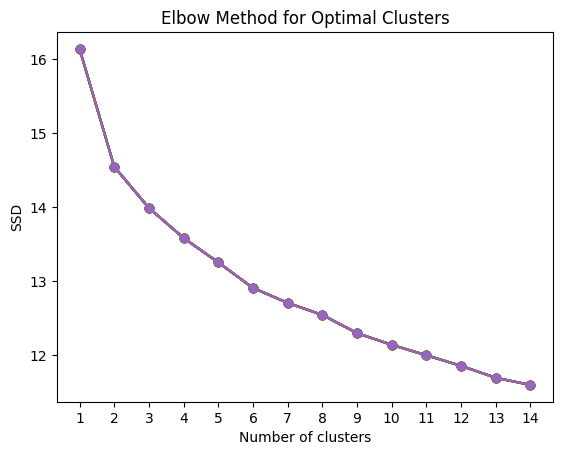

In [ ]:
for i, n_init in enumerate(n_init_r):
    plt.plot(k_range, [distance_parameter[j][i] for j in range(len(k_range))], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSD')
plt.title('Elbow Method for Optimal Clusters')
plt.xticks(k_range)
plt.show()


***According to the graph the Sum of Squared Distances (SSD) starts to decrease at a slower rate after number of clusters of k = 3 so that will be our optimal number of clusters.***

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=10, n_init="auto").fit(y)

In [ ]:
kmeans.inertia_

13.962861480005

***K Means Inertia value is good because lower the better***